In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
# after pulling data check if there are any nulls in the data
df.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#drop columns that i do not need
drop_cols=['num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3',
           'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide',
         'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton',
          'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
'metformin-rosiglitazone','change','diabetesMed','readmitted','weight','admission_type_id','discharge_disposition_id','admission_source_id',
'time_in_hospital','payer_code','medical_specialty']
df.drop(drop_cols, inplace=True, axis=1),

(None,)

In [6]:
df

,encounter_id,patient_nbr,race,gender,age,num_lab_procedures,num_procedures,number_diagnoses
0,2278392,8222157,Caucasian,Female,[0-10),41,0,1
1,149190,55629189,Caucasian,Female,[10-20),59,0,9
2,64410,86047875,AfricanAmerican,Female,[20-30),11,5,6
3,500364,82442376,Caucasian,Male,[30-40),44,1,7
4,16680,42519267,Caucasian,Male,[40-50),51,0,5
...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),51,0,9
101762,443847782,74694222,AfricanAmerican,Female,[80-90),33,3,9
101763,443854148,41088789,Caucasian,Male,[70-80),53,0,13
101764,443857166,31693671,Caucasian,Female,[80-90),45,2,9


In [7]:
# do not need encounter id number and patient nbr
drop_cols=['encounter_id','patient_nbr']
df.drop(drop_cols, inplace=True, axis=1)

In [8]:
df

,race,gender,age,num_lab_procedures,num_procedures,number_diagnoses
0,Caucasian,Female,[0-10),41,0,1
1,Caucasian,Female,[10-20),59,0,9
2,AfricanAmerican,Female,[20-30),11,5,6
3,Caucasian,Male,[30-40),44,1,7
4,Caucasian,Male,[40-50),51,0,5
...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),51,0,9
101762,AfricanAmerican,Female,[80-90),33,3,9
101763,Caucasian,Male,[70-80),53,0,13
101764,Caucasian,Female,[80-90),45,2,9


In [9]:
#filter to specifically female
df1=df[df['gender']=='Female']

In [10]:
df1

,race,gender,age,num_lab_procedures,num_procedures,number_diagnoses
0,Caucasian,Female,[0-10),41,0,1
1,Caucasian,Female,[10-20),59,0,9
2,AfricanAmerican,Female,[20-30),11,5,6
8,Caucasian,Female,[80-90),68,2,8
9,Caucasian,Female,[90-100),33,3,8
...,...,...,...,...,...,...
101757,Caucasian,Female,[70-80),21,1,9
101758,Caucasian,Female,[80-90),76,1,9
101760,AfricanAmerican,Female,[60-70),45,1,9
101762,AfricanAmerican,Female,[80-90),33,3,9


In [11]:
#continue to narrow it now by race to Asian
df2=df1[df1['race']=='Asian']

In [12]:
df2

,race,gender,age,num_lab_procedures,num_procedures,number_diagnoses
384,Asian,Female,[50-60),46,0,6
804,Asian,Female,[60-70),59,3,6
1073,Asian,Female,[50-60),52,0,5
1225,Asian,Female,[50-60),60,0,7
2193,Asian,Female,[70-80),40,0,4
...,...,...,...,...,...,...
101422,Asian,Female,[70-80),74,3,9
101432,Asian,Female,[70-80),37,0,6
101501,Asian,Female,[80-90),40,0,6
101595,Asian,Female,[70-80),44,0,9


<AxesSubplot:xlabel='num_lab_procedures', ylabel='age'>

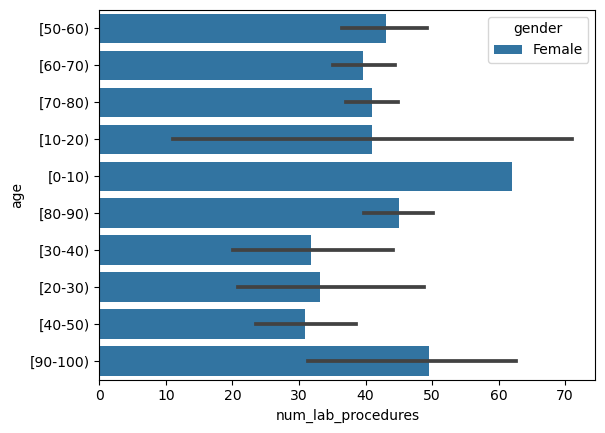

In [13]:
sns.barplot(x='num_lab_procedures',y='age',data=df2, hue='gender')
#graph specifically for num lab procedures

<AxesSubplot:xlabel='num_procedures', ylabel='age'>

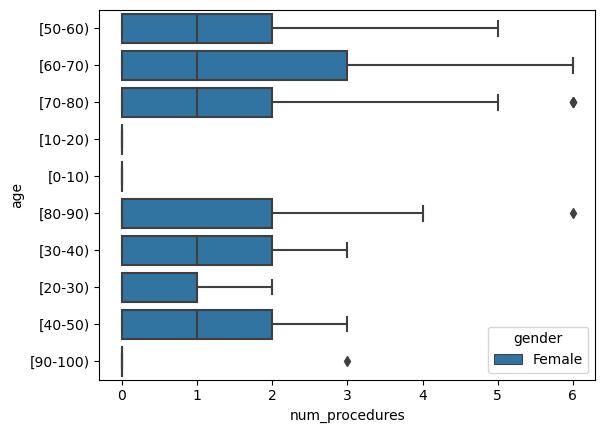

In [27]:
sns.boxplot(x='num_procedures',y='age',data=df2, hue='gender')

In [15]:
df2.groupby(['gender','age'])['num_lab_procedures'].sum()

gender  age     
Female  [0-10)        62
        [10-20)       82
        [20-30)      166
        [30-40)      350
        [40-50)      741
        [50-60)     1936
        [60-70)     3093
        [70-80)     3565
        [80-90)     2703
        [90-100)     248
Name: num_lab_procedures, dtype: int64

In [16]:
#checking amounts specifically for num lab procedures and num procedures to do comparision for asian
df2.groupby(['gender','age'])['num_procedures'].sum()

gender  age     
Female  [0-10)        0
        [10-20)       0
        [20-30)       4
        [30-40)      12
        [40-50)      30
        [50-60)      52
        [60-70)     121
        [70-80)     104
        [80-90)      58
        [90-100)      3
Name: num_procedures, dtype: int64

In [18]:
#comparision two different race
df3=df1[df1['race']=='Caucasian']

In [19]:
df3

,race,gender,age,num_lab_procedures,num_procedures,number_diagnoses
0,Caucasian,Female,[0-10),41,0,1
1,Caucasian,Female,[10-20),59,0,9
8,Caucasian,Female,[80-90),68,2,8
9,Caucasian,Female,[90-100),33,3,8
12,Caucasian,Female,[40-50),60,0,8
...,...,...,...,...,...,...
101750,Caucasian,Female,[80-90),31,2,9
101754,Caucasian,Female,[70-80),50,2,9
101757,Caucasian,Female,[70-80),21,1,9
101758,Caucasian,Female,[80-90),76,1,9


In [20]:
#get more information to compare race
df3.groupby(['gender','age'])['num_lab_procedures'].sum()

gender  age     
Female  [0-10)        3016
        [10-20)      11005
        [20-30)      26709
        [30-40)      49811
        [40-50)     121897
        [50-60)     234278
        [60-70)     334028
        [70-80)     466515
        [80-90)     385207
        [90-100)     73919
Name: num_lab_procedures, dtype: int64

In [21]:
df3.groupby(['gender','age'])['num_procedures'].sum()

gender  age     
Female  [0-10)         14
        [10-20)        69
        [20-30)       575
        [30-40)      1417
        [40-50)      3939
        [50-60)      8132
        [60-70)     11703
        [70-80)     14317
        [80-90)      8586
        [90-100)     1100
Name: num_procedures, dtype: int64

<AxesSubplot:xlabel='num_lab_procedures', ylabel='age'>

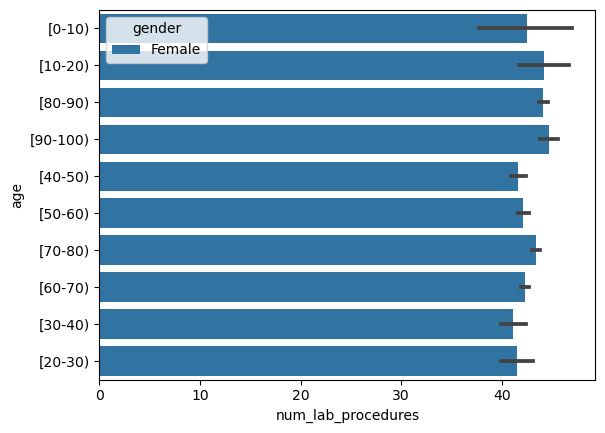

In [22]:
sns.barplot(x='num_lab_procedures',y='age',data=df3, hue='gender')
#graph specifically for caucasians for num lab procedures 

<AxesSubplot:xlabel='num_procedures', ylabel='age'>

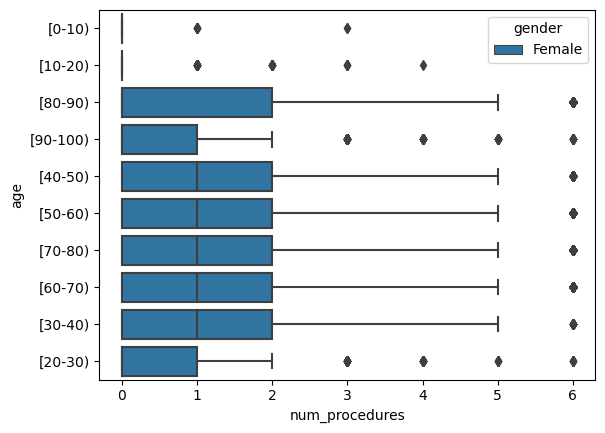

In [26]:
sns.boxplot(x='num_procedures',y='age',data=df3, hue='gender')
#graph specifically for casucasians for number procedures 

In [28]:
df2.describe()

,num_lab_procedures,num_procedures,number_diagnoses
count,318.000000,318.000000,318.000000
mean,40.710692,1.207547,7.122642
std,20.944073,1.438872,2.051557
min,1.000000,0.000000,1.000000
25%,25.250000,0.000000,6.000000
50%,41.000000,1.000000,8.000000
75%,56.000000,2.000000,9.000000
max,97.000000,6.000000,9.000000


In [29]:
df3.describe()

,num_lab_procedures,num_procedures,number_diagnoses
count,39689.000000,39689.000000,39689.000000
mean,42.993903,1.256066,7.575424
std,20.221102,1.640966,1.858264
min,1.000000,0.000000,1.000000
25%,30.000000,0.000000,6.000000
50%,45.000000,1.000000,9.000000
75%,58.000000,2.000000,9.000000
max,129.000000,6.000000,16.000000


In [ ]:
#after doing the analysis you can see that Caucasians need more num lab procedures and regular procedures compare to Asians.
#you can also see Asians and caucasians at the age between 70 to 80 tend to need more number lab procedures over all the ages base off the graph